# **Outlier Detection: Z-Score Method**

## **1️⃣ Z-Score Method**
### **Formula:**  
$$
Z = \frac{(X - \mu)}{\sigma}
$$
where:  
- $X$ = data point  
- $\mu$ = mean of the dataset  
- $\sigma$ = standard deviation  

### **Outlier Detection Rule:**  
- If |Z| > 3 (i.e., Z > 3 or Z < -3), the data point is an outlier.

### ✅ **Use Z-Score When:**
- Data follows a **normal distribution** (bell-shaped).  
- Dataset is **large ($n > 30$)** for stable mean and std.  
- Data has **few extreme outliers** (mean & std are reliable).  

### ❌ **Avoid Z-Score When:**
- Data is **skewed** (use IQR instead).  
- Dataset is **small ($n < 30$)** (mean & std are unstable).  
- Too many outliers (they distort mean & std).  

---

## **2️⃣ Simplified Formula (Mean ± 3*Std)**
### **Formulas:**  
$$
\text{Lower Bound} = \mu - 3\sigma
$$  
$$
\text{Upper Bound} = \mu + 3\sigma
$$  
where:  
- $\mu$ = mean  
- $\sigma$ = standard deviation  
- Any value **outside** this range is an outlier.  




In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('/content/placement_college.csv')
df.head(), df.shape

(   cgpa  placement_exam_marks  placed
 0  7.19                  26.0       1
 1  7.46                  38.0       1
 2  7.54                  40.0       1
 3  6.42                   8.0       1
 4  7.23                  17.0       0,
 (1000, 3))

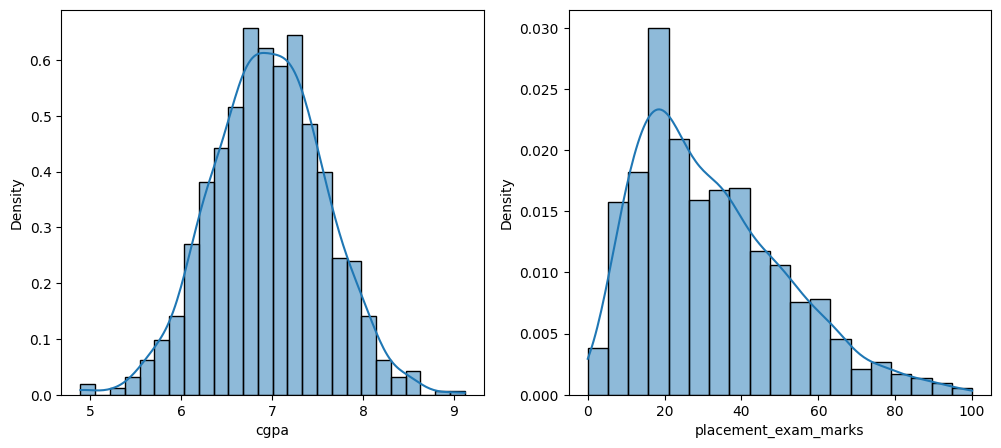

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"], kde=True, stat="density")
plt.subplot(1,2,2)
sns.histplot(df["placement_exam_marks"], kde=True, stat="density")
plt.show()

In [42]:
print("Mean:", df["cgpa"].mean())
print("Std:", df["cgpa"].std())
print("Min:", df["cgpa"].min())
print("Max:", df["cgpa"].max())

Mean: 6.96124
Std: 0.6158978751323894
Min: 4.89
Max: 9.12


In [43]:
# Finding the Boundary Values
highest = df["cgpa"].mean() + 3*df["cgpa"].std()
lowest = df["cgpa"].mean() - 3*df["cgpa"].std()
print("Highest allowed", highest)
print("Lowest allowed", lowest)

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [44]:
# Finding Outliers
df[(df['cgpa'] > highest) | (df['cgpa'] < lowest)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [45]:
# Simplified Formula
new_df = df[(df['cgpa'] < highest) & (df['cgpa'] > lowest)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [46]:
# Using Z-Score
z_score = (df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std()

Z_df = df[(z_score > 3) | (z_score < -3)]
Z_df

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [47]:
new_df_z = df[(z_score < 3) & (z_score > -3)]
new_df_z

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# Capping

In [48]:
upper_limit = highest
lower_limit = lowest

In [49]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [50]:
df.shape

(1000, 3)

In [51]:
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [52]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
